### Edgar Moises Hernandez-Gonzalez
#### 13/05/20-19/05/20
#### Regresion con CNN-1D, LSTM y GRU para predecir la funcion seno
##### Salida: Vector

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv1D, MaxPool1D, Flatten, LSTM, GRU, Dense

Using TensorFlow backend.


In [0]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [0]:
#para predecir seno
datos = [-0.0000, -0.0634, -0.1266, -0.1893, -0.2511, -0.3120, -0.3717,
         -0.4298, -0.4862, -0.5406, -0.5929, -0.6428, -0.6901, -0.7346,
         -0.7761, -0.8146, -0.8497, -0.8815, -0.9096, -0.9341, -0.9549,
         -0.9718, -0.9848, -0.9938, -0.9989, -0.9999, -0.9969, -0.9898, 
         -0.9788, -0.9638, -0.9450, -0.9224, -0.8960, -0.8660, -0.8326, 
         -0.7958, -0.7557, -0.7127, -0.6668, -0.6182, -0.5671, -0.5137, 
         -0.4582, -0.4009, -0.3420, -0.2817, -0.2203, -0.1580, -0.0951,
         -0.0317, 0.0317, 0.0951, 0.1580, 0.2203, 0.2817, 0.3420, 0.4009,
         0.4582, 0.5137, 0.5671, 0.6182, 0.6668, 0.7127, 0.7557, 0.7958,
         0.8326, 0.8660, 0.8960, 0.9224, 0.9450, 0.9638, 0.9788, 0.9898,
         0.9969, 0.9999, 0.9989, 0.9938, 0.9848, 0.9718, 0.9549, 0.9341,
         0.9096, 0.8815, 0.8497, 0.8146, 0.7761, 0.7346, 0.6901, 0.6428,
         0.5929, 0.5406, 0.4862, 0.4298, 0.3717, 0.3120, 0.2511, 0.1893,
         0.1266, 0.0634, 0.0000]

In [4]:
len(datos)

100

In [0]:
len_samples = 7
len_vector = 3
x, y = split_sequence(datos, len_samples, len_vector)

In [6]:
print(x.shape)
print(y.shape)

(91, 7)
(91, 3)


In [7]:
#convertir de 2D a 3D
x = x.reshape((x.shape[0], x.shape[1], 1))

print(x.shape)

(91, 7, 1)


In [0]:
# mse = 0.0482
def model_cnn_1d_vector():
  model = Sequential()
  model.add(Conv1D(8, 3, activation='relu', input_shape=x.shape[1:]))
  model.add(MaxPool1D(2))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(len_vector))
  model.compile(optimizer='adam', loss='mse')
  return model

In [0]:
# mse = 0.0402
def model_lstm_vector():
  model = Sequential()
  model.add(LSTM(64, activation='tanh', input_shape=x.shape[1:]))
  model.add(Dense(len_vector))
  model.compile(optimizer='adam', loss='mse')
  return model

In [0]:
# mse = 0.0239
def model_gru_vector():
  model = Sequential()
  model.add(GRU(64, activation='tanh', input_shape=x.shape[1:]))
  model.add(Dense(len_vector))
  model.compile(optimizer='adam', loss='mse')
  return model

In [0]:
#model = model_cnn_1d_vector()
#model = model_lstm_vector()
model = model_gru_vector()

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 64)                12672     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 12,867
Trainable params: 12,867
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x, y, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
 - 1s - loss: 0.4295
Epoch 2/20
 - 0s - loss: 0.3564
Epoch 3/20
 - 0s - loss: 0.2891
Epoch 4/20
 - 0s - loss: 0.2284
Epoch 5/20
 - 0s - loss: 0.1744
Epoch 6/20
 - 0s - loss: 0.1273
Epoch 7/20
 - 0s - loss: 0.0881
Epoch 8/20
 - 0s - loss: 0.0619
Epoch 9/20
 - 0s - loss: 0.0432
Epoch 10/20
 - 0s - loss: 0.0353
Epoch 11/20
 - 0s - loss: 0.0329
Epoch 12/20
 - 0s - loss: 0.0349
Epoch 13/20
 - 0s - loss: 0.0363
Epoch 14/20
 - 0s - loss: 0.0360
Epoch 15/20
 - 0s - loss: 0.0336
Epoch 16/20
 - 0s - loss: 0.0310
Epoch 17/20
 - 0s - loss: 0.0292
Epoch 18/20
 - 0s - loss: 0.0284
Epoch 19/20
 - 0s - loss: 0.0284
Epoch 20/20
 - 0s - loss: 0.0282


In [14]:
test_loss = model.evaluate(x, y, verbose=2)
print('Test loss:', test_loss)

Test loss: 0.028124138426322203


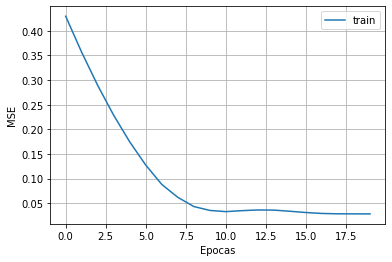

In [15]:
plt.plot(history.history['loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('MSE')
plt.legend(['train', 'test'])
plt.show()

In [0]:
y_pred_todo = model.predict(x)

In [17]:
df_y = pd.DataFrame(y)
df_y_pred_todo = pd.DataFrame(y_pred_todo)
comparar = pd.concat([df_y, df_y_pred_todo], axis=1)
comparar

,0,1,2,0,1,2
0,-0.4298,-0.4862,-0.5406,-0.210947,-0.162598,-0.204960
1,-0.4862,-0.5406,-0.5929,-0.272059,-0.220918,-0.265479
2,-0.5406,-0.5929,-0.6428,-0.332100,-0.278399,-0.324945
3,-0.5929,-0.6428,-0.6901,-0.390759,-0.334737,-0.383040
4,-0.6428,-0.6901,-0.7346,-0.447764,-0.389654,-0.439490
...,...,...,...,...,...,...
86,0.3717,0.3120,0.2511,0.548136,0.544517,0.543708
87,0.3120,0.2511,0.1893,0.498759,0.499665,0.495227
88,0.2511,0.1893,0.1266,0.447089,0.452526,0.444459
89,0.1893,0.1266,0.0634,0.393304,0.403248,0.391580


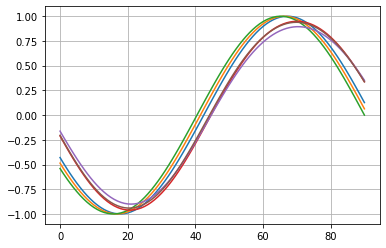

In [18]:
plt.plot(y)
plt.plot(y_pred_todo)
plt.grid()
plt.show()

In [19]:
num_test = 5
print("Etiqueta verdadera", y[num_test])
pred = model.predict(x[num_test].reshape(1,len_samples,1))
print("Etiqueta predicha", pred)

Etiqueta verdadera [-0.6901 -0.7346 -0.7761]
Etiqueta predicha [[-0.50283986 -0.4428783  -0.49400982]]


In [0]:
x_verdad = np.zeros(len_samples)
for i in range(len_samples):
    x_verdad[i] = x[num_test, i]

In [0]:
futuro = np.zeros(len_vector)
for i in range(len_vector):
    futuro[i] = pred[0,i]

In [22]:
real = np.concatenate((x_verdad, y[num_test]))
real.shape

(10,)

In [23]:
predicho = np.concatenate((x_verdad, futuro))
predicho.shape

(10,)

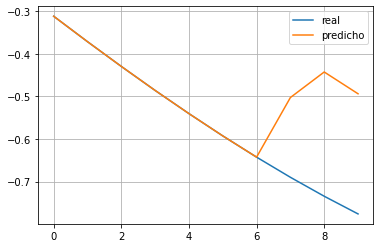

In [24]:
plt.plot(real)
plt.plot(predicho)
plt.grid()
plt.legend(['real', 'predicho'])
plt.show()